In [2]:
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt

In [3]:
data=fetch_20newsgroups()

In [4]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
categories=data.target_names

In [6]:
categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
train=fetch_20newsgroups(subset="train",categories=categories)

In [8]:
test=fetch_20newsgroups(subset="test",categories=categories)

In [9]:
test.data[5]

'From: banschbach@vms.ocom.okstate.edu\nSubject: Re: Candida(yeast) Bloom, Fact or Fiction\nOrganization: OSU College of Osteopathic Medicine\nLines: 91\nNntp-Posting-Host: vms.ocom.okstate.edu\n\nIn article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:\n> \n> In a previous article, banschbach@vms.ocom.okstate.edu () says:\n>>least a few "enlightened" physicians practicing in the U.S.  It\'s really \n>>too bad that most U.S. medical schools don\'t cover nutrition because if \n>>they did, candida would not be viewed as a non-disease by so many in the \n>>medical profession.\n> \n> Case Western Reserve Med School teaches nutrition in its own section as\n> well as covering it in other sections as they apply (i.e. B12\n> deficiency in neuro as a cause of neuropathy, B12 deficiency in\n> hematology as a cause of megaloblastic anemia), yet I sill\n> hold the viewpoint of mainstream medicine:  candida can cause\n> mucocutaneous candidiasis, and, in already

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [50]:
model= make_pipeline(TfidfVectorizer(),MultinomialNB(alpha=0.1))

In [51]:
model.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB(alpha=0.1))])

In [52]:
y_pred=model.predict(test.data)

In [53]:
y_act=test.target

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [55]:
score=accuracy_score(y_act,y_pred)*100

In [56]:
cm=confusion_matrix(y_act,y_pred)

Text(0.5, 1.0, 'Accuracy:82.63409453000531')

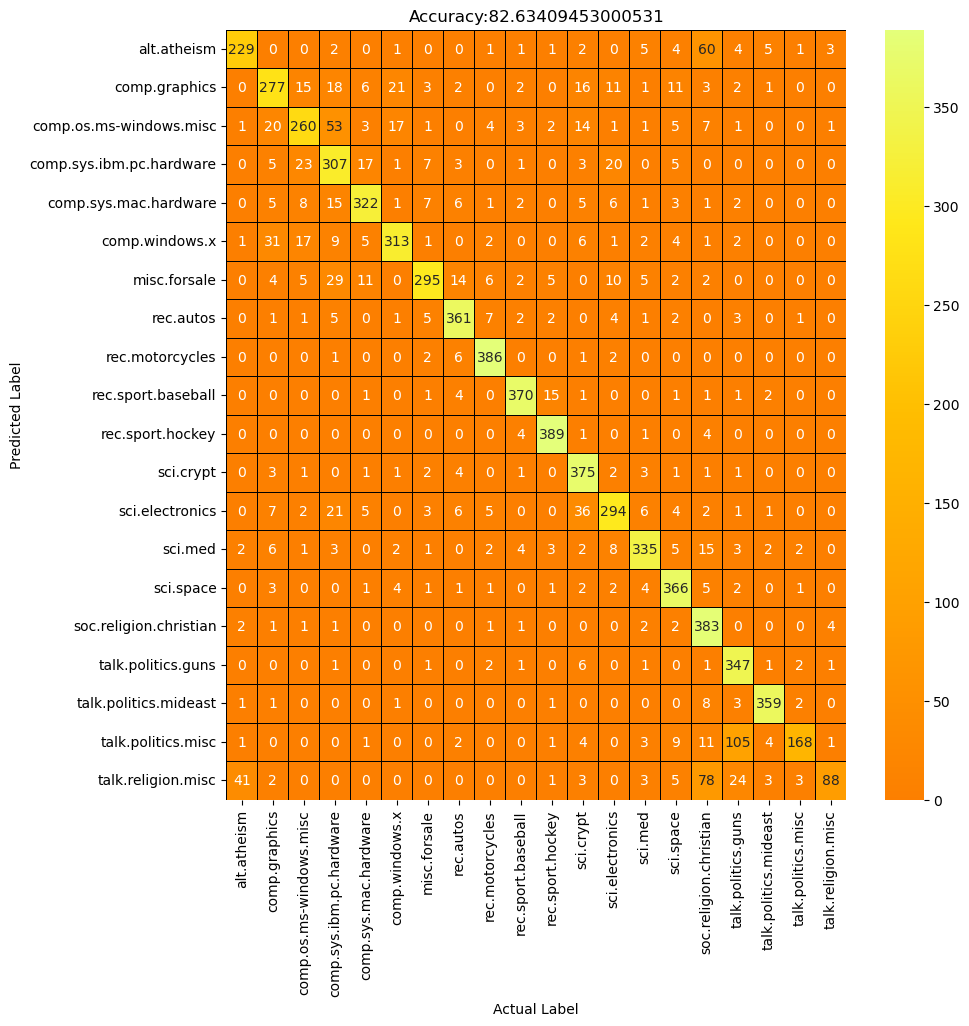

In [57]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="black",cmap=plt.cm.Wistia_r,fmt="d",xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title(f"Accuracy:{score}")

In [58]:
#manual testing
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [59]:
predict_category("Cars are the next big thing")

'rec.autos'

In [60]:
pred=model.predict(["jesus christ"])

In [61]:
train.target_names[pred[0]]

'soc.religion.christian'

In [62]:
pred=model.predict(["India's prime minister narendra modi has announced free electricity to all over the country"])
train.target_names[pred[0]]

'talk.politics.mideast'